In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np

In [ ]:
df = pd.read_csv("/content/data_file.csv")
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
df.drop_duplicates(keep='last', inplace=True)
df.to_csv("df_clear.csv")

In [ ]:

df = pd.read_csv("df_clear.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [ ]:

X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(100), input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), callbacks=[early_stopping])

Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9139 - loss: 0.2195 - val_accuracy: 0.9597 - val_loss: 0.1033
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9662 - loss: 0.0937 - val_accuracy: 0.9778 - val_loss: 0.0690
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9753 - loss: 0.0709 - val_accuracy: 0.9800 - val_loss: 0.0629
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.9786 - loss: 0.0623 - val_accuracy: 0.9763 - val_loss: 0.0671
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9784 - loss: 0.0615 - val_accuracy: 0.9820 - val_loss: 0.0602
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9812 - loss: 0.0573 - val_accuracy: 0.9831 - val_loss: 0.0538
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9814 - loss: 0.0571 - val_accuracy: 0.9826 - val_loss: 0.0576
Epoch 8/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9815 - loss: 0.0544 - 

In [ ]:
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), callbacks=[early_stopping])

Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9821 - loss: 0.0492 - val_accuracy: 0.9842 - val_loss: 0.0553
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9830 - loss: 0.0501 - val_accuracy: 0.9823 - val_loss: 0.0530
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9815 - loss: 0.0514 - val_accuracy: 0.9825 - val_loss: 0.0589


In [ ]:
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")

202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2090   51]
 [  51 4260]]


<Figure size 640x480 with 0 Axes>

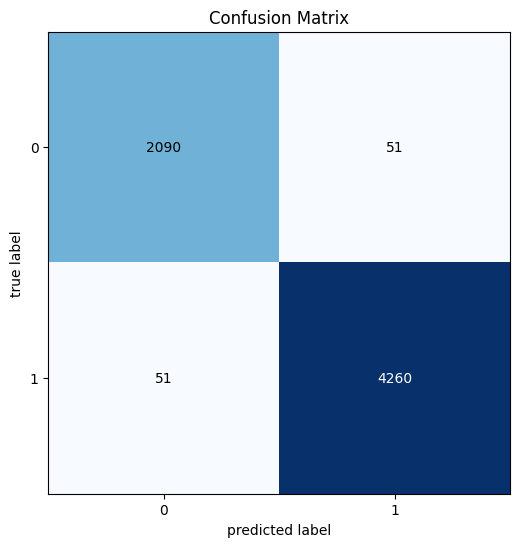

In [ ]:
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2141
           1       0.99      0.99      0.99      4311

    accuracy                           0.98      6452
   macro avg       0.98      0.98      0.98      6452
weighted avg       0.98      0.98      0.98      6452



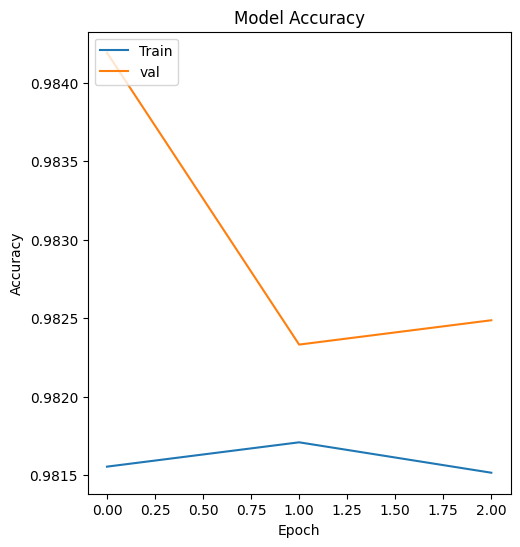

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')

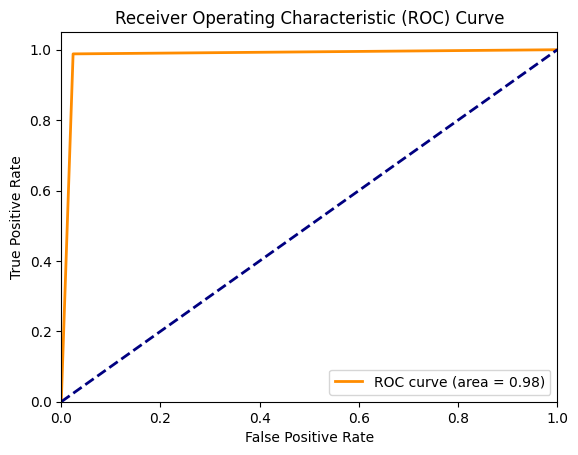

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

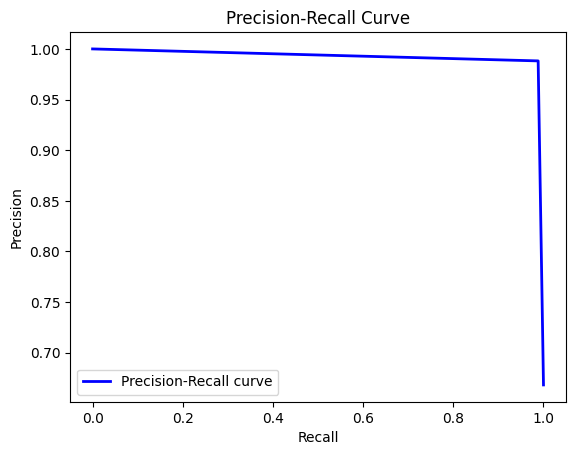

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()